In [1]:
import pandas as pd

df2_soundtracks = pd.read_csv('data/set1.csv')
df2_soundtracks['Max_emotion'] = df2_soundtracks[['Anger', 'Fear', 'Happy','Sad', 'Tender']].idxmax(axis="columns")

In [2]:
# Accuracy for LogRegression & T-TESTS compared to DUmmy Classifier

from statistics import mean, stdev
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.dummy import DummyClassifier
from scipy import stats
import numpy as np
import warnings
from sklearn.exceptions import DataConversionWarning
warnings.filterwarnings(action='ignore', category=DataConversionWarning)

X = df2_soundtracks[['Valence', 'Energy', 'Tension']]
y = df2_soundtracks[['Max_emotion']]

model = LogisticRegression(multi_class='multinomial', max_iter=600)
dummymodel = DummyClassifier(strategy='most_frequent')
p_values = []

t_stats = []
for i in range(20):
      skf = StratifiedKFold(n_splits=5, random_state=i, shuffle=True)
      logreg_stratified = []
      dummymodel_stratified = []
      for train_index, test_index in skf.split(X, y):
            x_train_fold, x_test_fold = X.loc[train_index], X.loc[test_index]
            y_train_fold, y_test_fold = y.loc[train_index], y.loc[test_index]
            model.fit(x_train_fold, y_train_fold)
            dummymodel.fit(x_train_fold, y_train_fold)
            logreg_score = model.score(x_test_fold, y_test_fold)
            dummy_score = dummymodel.score(x_test_fold, y_test_fold)
            logreg_stratified.append(logreg_score)
            dummymodel_stratified.append(dummy_score)

      #t-test
      score_diff = np.subtract(logreg_stratified, dummymodel_stratified)
      avg_diff = np.mean(score_diff)
      numerator = avg_diff * np.sqrt(len(score_diff))
      denominator = np.sqrt(sum([(diff - avg_diff) ** 2 for diff in score_diff]) / (len(score_diff) - 1))
      t_stat = numerator / denominator
      pvalue = stats.t.sf(np.abs(t_stat), len(score_diff) - 1) * 2.0
      t_stats.append(t_stat)
      p_values.append(pvalue)
      
print("t-stat", np.mean(t_stats), "p-value", np.mean(p_values))
  
# Print the output.
print('List of possible accuracy:', logreg_stratified)
print('\nMaximum Accuracy That can be obtained from this model is:',
      max(logreg_stratified)*100, '%')
print('\nMinimum Accuracy:',
      min(logreg_stratified)*100, '%')
print('\nOverall Accuracy:',
      mean(logreg_stratified)*100, '%')
print('\nStandard Deviation is:', stdev(logreg_stratified))

print("dummymodel average:", mean(dummymodel_stratified)*100, '%')
print("logreg - dummy - means diff: ", (mean(logreg_stratified) - mean(dummymodel_stratified) ), 
      "std diff: ", stdev([mean(logreg_stratified), mean(dummymodel_stratified)]))

t-stat 25.348712279408964 p-value 7.56653577827109e-05
List of possible accuracy: [0.7083333333333334, 0.6944444444444444, 0.6111111111111112, 0.75, 0.7361111111111112]

Maximum Accuracy That can be obtained from this model is: 75.0 %

Minimum Accuracy: 61.111111111111114 %

Overall Accuracy: 70.0 %

Standard Deviation is: 0.05432668671002206
dummymodel average: 25.833333333333336 %
logreg - dummy - means diff:  0.4416666666666667 std diff:  0.3123054950240585


In [5]:
# Accuracy for Decision Tree & T-TESTS compared to DUmmy Classifier


from statistics import mean, stdev
from sklearn.model_selection import StratifiedKFold
from sklearn.dummy import DummyClassifier
from sklearn.tree import DecisionTreeClassifier
from scipy import stats
import numpy as np

X = df2_soundtracks[['Valence', 'Energy', 'Tension']]
y = df2_soundtracks[['Max_emotion']]

model = DecisionTreeClassifier(max_depth=3, criterion='gini')
dummymodel =  DummyClassifier(strategy='most_frequent')
p_values = []
t_stats = []
for i in range(20):
      skf = StratifiedKFold(n_splits=5, random_state=i, shuffle=True)
      decisiontree_stratified = []
      dummymodel_stratified = []
      for train_index, test_index in skf.split(X, y):
            x_train_fold, x_test_fold = X.loc[train_index], X.loc[test_index]
            y_train_fold, y_test_fold = y.loc[train_index], y.loc[test_index]
            model.fit(x_train_fold, y_train_fold)
            dummymodel.fit(x_train_fold, y_train_fold)
            decisiontree_score = model.score(x_test_fold, y_test_fold)
            dummy_score = dummymodel.score(x_test_fold, y_test_fold)
            decisiontree_stratified.append(decisiontree_score)
            dummymodel_stratified.append(dummy_score)

      #t-test
      score_diff = np.subtract(decisiontree_stratified, dummymodel_stratified)
      avg_diff = np.mean(score_diff)
      numerator = avg_diff * np.sqrt(len(score_diff))
      denominator = np.sqrt(sum([(diff - avg_diff) ** 2 for diff in score_diff]) / (len(score_diff) - 1))
      t_stat = numerator / denominator
      pvalue = stats.t.sf(np.abs(t_stat), len(score_diff) - 1) * 2.0
      t_stats.append(t_stat)
      p_values.append(pvalue)
      
print("t-stat", np.mean(t_stats), "p-value", np.mean(p_values))
  
# Print the output.
print('List of possible accuracy:', decisiontree_stratified)
print('\nMaximum Accuracy That can be obtained from this model is:',
      max(decisiontree_stratified)*100, '%')
print('\nMinimum Accuracy:',
      min(decisiontree_stratified)*100, '%')
print('\nOverall Accuracy:',
      mean(decisiontree_stratified)*100, '%')
print('\nStandard Deviation is:', stdev(decisiontree_stratified))

print("dummymodel average:", mean(dummymodel_stratified)*100, '%')
print("decisiontree - dummy - means diff: ", (mean(decisiontree_stratified) - mean(dummymodel_stratified) ), 
      "std diff: ", stdev([mean(decisiontree_stratified), mean(dummymodel_stratified)]))

t-stat 26.177083240032186 p-value 9.82978336525902e-05
List of possible accuracy: [0.6388888888888888, 0.6944444444444444, 0.625, 0.6805555555555556, 0.6944444444444444]

Maximum Accuracy That can be obtained from this model is: 69.44444444444444 %

Minimum Accuracy: 62.5 %

Overall Accuracy: 66.66666666666666 %

Standard Deviation is: 0.032572331665440483
dummymodel average: 25.833333333333336 %
decisiontree - dummy - means diff:  0.40833333333333327 std diff:  0.28873526898450685


In [3]:
# Accuracy for KNN & T-TESTS compared to DUmmy Classifier

from statistics import mean, stdev
from sklearn.model_selection import StratifiedKFold
from sklearn.dummy import DummyClassifier
from sklearn.neighbors import KNeighborsClassifier
from scipy import stats
import numpy as np

X = df2_soundtracks[['Valence', 'Energy', 'Tension']]
y = df2_soundtracks[['Max_emotion']]

model = KNeighborsClassifier(n_neighbors=6)
dummymodel =  DummyClassifier(strategy='most_frequent')
p_values = []
t_stats = []
for i in range(20):
      skf = StratifiedKFold(n_splits=5, random_state=i, shuffle=True)
      knn_stratified = []
      dummymodel_stratified = []
      for train_index, test_index in skf.split(X, y):
            x_train_fold, x_test_fold = X.loc[train_index], X.loc[test_index]
            y_train_fold, y_test_fold = y.loc[train_index], y.loc[test_index]
            model.fit(x_train_fold, y_train_fold)
            dummymodel.fit(x_train_fold, y_train_fold)
            knn_score = model.score(x_test_fold, y_test_fold)
            dummy_score = dummymodel.score(x_test_fold, y_test_fold)
            knn_stratified.append(knn_score)
            dummymodel_stratified.append(dummy_score)

      #t-test
      score_diff = np.subtract(knn_stratified, dummymodel_stratified)
      avg_diff = np.mean(score_diff)
      numerator = avg_diff * np.sqrt(len(score_diff))
      denominator = np.sqrt(sum([(diff - avg_diff) ** 2 for diff in score_diff]) / (len(score_diff) - 1))
      t_stat = numerator / denominator
      pvalue = stats.t.sf(np.abs(t_stat), len(score_diff) - 1) * 2.0
      t_stats.append(t_stat)
      p_values.append(pvalue)
      
print("t-stat", np.mean(t_stats), "p-value", np.mean(p_values))
  
# Print the output.
print('List of possible accuracy:', knn_stratified)
print('\nMaximum Accuracy That can be obtained from this model is:',
      max(knn_stratified)*100, '%')
print('\nMinimum Accuracy:',
      min(knn_stratified)*100, '%')
print('\nOverall Accuracy:',
      mean(knn_stratified)*100, '%')
print('\nStandard Deviation is:', stdev(knn_stratified))

print("dummymodel average:", mean(dummymodel_stratified)*100, '%')
print("KNN - dummy - means diff: ", (mean(knn_stratified) - mean(dummymodel_stratified) ), 
      "std diff: ", stdev([mean(knn_stratified), mean(dummymodel_stratified)]))


t-stat 23.30443074416793 p-value 6.21017991947716e-05
List of possible accuracy: [0.6666666666666666, 0.6527777777777778, 0.6111111111111112, 0.6805555555555556, 0.7361111111111112]

Maximum Accuracy That can be obtained from this model is: 73.61111111111111 %

Minimum Accuracy: 61.111111111111114 %

Overall Accuracy: 66.94444444444446 %

Standard Deviation is: 0.04543174231610035
dummymodel average: 25.833333333333336 %
KNN - dummy - means diff:  0.41111111111111115 std diff:  0.2906994544878029


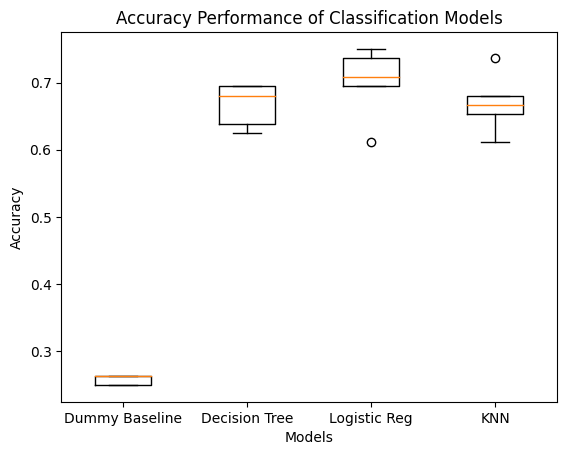

In [5]:
#BOXPLOT

import matplotlib.pyplot as plt

# Create a list of accuracy values for different models or experiments

# Plot the box plot
plt.boxplot([dummymodel_stratified, decisiontree_stratified, logreg_stratified, knn_stratified])
model_labels = ['Dummy Baseline', 'Decision Tree', 'Logistic Reg', 'KNN']
plt.xticks(range(1, len(model_labels) + 1), model_labels)

# Set the title and labels
plt.title('Accuracy Performance of Classification Models')
plt.xlabel('Models')
plt.ylabel('Accuracy')

# Display the plot
plt.show()


In [6]:
# get each model's accuracies per class
from sklearn.metrics import accuracy_score

X = df2_soundtracks[['Valence', 'Energy', 'Tension']]
y = df2_soundtracks[['Max_emotion']] 

knn = KNeighborsClassifier(n_neighbors=6)
dtc = DecisionTreeClassifier(max_depth=3, criterion='gini')
lr = LogisticRegression(multi_class='multinomial', max_iter=600)

emotion_classes = ['Anger', 'Fear', 'Happy','Sad', 'Tender']

lr_emotions_list = [[], [], [], [], []]
dtc_emotions_list = [[], [], [], [], []]
knn_emotions_list = [[], [], [], [], []]
for i in range(20):
    skf = StratifiedKFold(n_splits=10, random_state=i, shuffle=True)
    for train_index, test_index in skf.split(X, y):
        x_train_fold, x_test_fold = X.loc[train_index], X.loc[test_index]
        y_train_fold, y_test_fold = y.loc[train_index], y.loc[test_index]
        lr.fit(x_train_fold, y_train_fold)
        knn.fit(x_train_fold, y_train_fold)
        dtc.fit(x_train_fold, y_train_fold)  

        for class_index in range(len(emotion_classes)):
            x_values = x_test_fold.loc[y_test_fold['Max_emotion'] == emotion_classes[class_index]]
            y_labels = y_test_fold.loc[y_test_fold['Max_emotion'] == emotion_classes[class_index]]

            lr_emotions_list[class_index].append(accuracy_score(y_labels, lr.predict(x_values)))
            dtc_emotions_list[class_index].append(accuracy_score(y_labels, dtc.predict(x_values)))
            knn_emotions_list[class_index].append(accuracy_score(y_labels, knn.predict(x_values)))

lr_averages = [sum(lst) / len(lst) for lst in lr_emotions_list]
dtc_averages = [sum(lst) / len(lst) for lst in dtc_emotions_list]
knn_averages = [sum(lst) / len(lst) for lst in knn_emotions_list]
print(lr_averages, '\n', dtc_averages, '\n', knn_averages, '\n', emotion_classes)

[0.36483333333333334, 0.7363333333333325, 0.8023809523809525, 0.6919642857142857, 0.762410714285714] 
 [0.6663333333333324, 0.5354999999999999, 0.8158333333333337, 0.6789285714285712, 0.7129464285714284] 
 [0.6699999999999992, 0.6218888888888887, 0.8504761904761909, 0.6668749999999999, 0.6805357142857141] 
 ['Anger', 'Fear', 'Happy', 'Sad', 'Tender']


In [7]:
# ANOVA TEST FOR logistic Reg accuracies PER CLASS

import pandas as pd
from statsmodels.stats.multicomp import pairwise_tukeyhsd

f_value, p_value = stats.f_oneway(lr_emotions_list[0], lr_emotions_list[1], lr_emotions_list[2], lr_emotions_list[3], lr_emotions_list[4])

# Print the test results
print("F-value:", f_value)
print("p-value:", p_value)


# Create DataFrame
data = pd.DataFrame({
    'Values': np.concatenate([lr_emotions_list[0], lr_emotions_list[1], lr_emotions_list[2], lr_emotions_list[3], lr_emotions_list[4]]),
    'Group': np.repeat(['Anger', 'Fear', 'Happy','Sad', 'Tender'],
                        [len(lr_emotions_list[0]), len(lr_emotions_list[1]), len(lr_emotions_list[2]), len(lr_emotions_list[3]), len(lr_emotions_list[4])])
})

# Perform pairwise Tukey's HSD test
tukey_result = pairwise_tukeyhsd(data['Values'], data['Group'])

# Print the results
print("Logistic Regression: ", '\n', tukey_result)

F-value: 227.1870211126053
p-value: 1.5442539724451182e-138
Logistic Regression:  
 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
 Anger   Fear   0.3715    0.0  0.3263  0.4167   True
 Anger  Happy   0.4375    0.0  0.3924  0.4827   True
 Anger    Sad   0.3271    0.0   0.282  0.3723   True
 Anger Tender   0.3976    0.0  0.3524  0.4427   True
  Fear  Happy    0.066 0.0007  0.0209  0.1112   True
  Fear    Sad  -0.0444 0.0569 -0.0895  0.0008  False
  Fear Tender   0.0261 0.5118 -0.0191  0.0712  False
 Happy    Sad  -0.1104    0.0 -0.1556 -0.0653   True
 Happy Tender    -0.04 0.1111 -0.0851  0.0052  False
   Sad Tender   0.0704 0.0002  0.0253  0.1156   True
----------------------------------------------------


In [8]:
# ANOVA Test for DTC accuracies per class

f_value, p_value = stats.f_oneway(dtc_emotions_list[0], dtc_emotions_list[1], dtc_emotions_list[2], dtc_emotions_list[3], dtc_emotions_list[4])

# Print the test results
print("F-value:", f_value)
print("p-value:", p_value)

import pandas as pd
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Create DataFrame
data = pd.DataFrame({
    'Values': np.concatenate([dtc_emotions_list[0], dtc_emotions_list[1], dtc_emotions_list[2], dtc_emotions_list[3], dtc_emotions_list[4]]),
    'Group': np.repeat(['Anger', 'Fear', 'Happy','Sad', 'Tender'],
                        [len(dtc_emotions_list[0]), len(dtc_emotions_list[1]), len(dtc_emotions_list[2]), len(dtc_emotions_list[3]), len(dtc_emotions_list[4])])
})

# Perform pairwise Tukey's HSD test
tukey_result = pairwise_tukeyhsd(data['Values'], data['Group'])

# Print the results
print("Decision Tree Classifier Results: ", '\n', tukey_result)

F-value: 59.83832093493937
p-value: 2.5984518621387433e-45
Decision Tree Classifier Results:  
 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
 Anger   Fear  -0.1314    0.0 -0.1817 -0.0811   True
 Anger  Happy   0.1488    0.0  0.0985  0.1991   True
 Anger    Sad   0.0126 0.9599 -0.0377  0.0629  False
 Anger Tender   0.0466 0.0844 -0.0037  0.0969  False
  Fear  Happy   0.2802    0.0  0.2299  0.3305   True
  Fear    Sad    0.144    0.0  0.0937  0.1943   True
  Fear Tender    0.178    0.0  0.1277  0.2283   True
 Happy    Sad  -0.1362    0.0 -0.1865 -0.0859   True
 Happy Tender  -0.1022    0.0 -0.1525 -0.0519   True
   Sad Tender    0.034 0.3466 -0.0163  0.0843  False
----------------------------------------------------


In [9]:
# ANOVA Test for KNN accuracies per class
f_value, p_value = stats.f_oneway(knn_emotions_list[0], knn_emotions_list[1], knn_emotions_list[2], knn_emotions_list[3], knn_emotions_list[4])

# Print the test results
print("F-value:", f_value)
print("p-value:", p_value)

import pandas as pd
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Create DataFrame
data = pd.DataFrame({
    'Values': np.concatenate([knn_emotions_list[0], knn_emotions_list[1], knn_emotions_list[2], knn_emotions_list[3], knn_emotions_list[4]]),
    'Group': np.repeat(['Anger', 'Fear', 'Happy','Sad', 'Tender'],
                        [len(knn_emotions_list[0]), len(knn_emotions_list[1]), len(knn_emotions_list[2]), len(knn_emotions_list[3]), len(knn_emotions_list[4])])
})

# Perform pairwise Tukey's HSD test
tukey_result = pairwise_tukeyhsd(data['Values'], data['Group'])

# Print the results
print("K-Nearest Neighbors results: ", '\n', tukey_result)

F-value: 51.95523599357424
p-value: 9.04271911584833e-40
K-Nearest Neighbors results:  
 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
 Anger   Fear  -0.0481 0.0438 -0.0954 -0.0008   True
 Anger  Happy   0.1805    0.0  0.1332  0.2278   True
 Anger    Sad  -0.0031 0.9998 -0.0504  0.0442  False
 Anger Tender   0.0105 0.9737 -0.0367  0.0578  False
  Fear  Happy   0.2286    0.0  0.1813  0.2759   True
  Fear    Sad    0.045  0.071 -0.0023  0.0923  False
  Fear Tender   0.0586 0.0065  0.0114  0.1059   True
 Happy    Sad  -0.1836    0.0 -0.2309 -0.1363   True
 Happy Tender  -0.1699    0.0 -0.2172 -0.1227   True
   Sad Tender   0.0137 0.9337 -0.0336  0.0609  False
----------------------------------------------------


C:\Users\aliss\AppData\Local\Temp\ipykernel_8204\1023915192.py:37: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(classes, rotation=-45, ha='left')


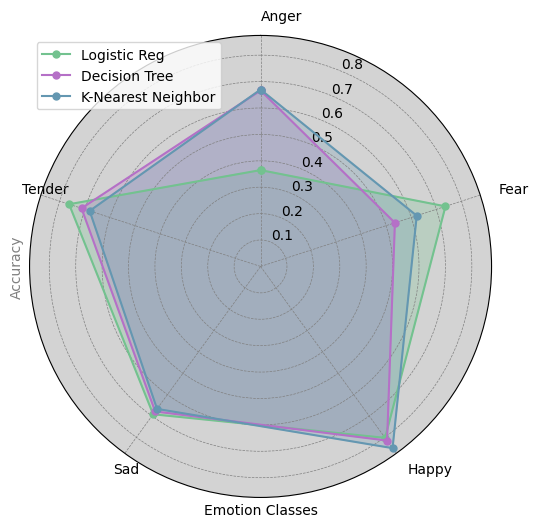

In [10]:
#Radar chart for accuracy of each model per class

import numpy as np
import matplotlib.pyplot as plt

models = ['Logistic Reg', 'Decision Tree', 'K-Nearest Neighbor']
classes = emotion_classes

# Accuracy values for each model and class
accuracy_data = [lr_averages, dtc_averages, knn_averages]
colors = ['#73c28f', '#b570c7', '#6497b1']



def plot_radar_chart():
    # Number of models
    num_models = len(models)

    # Compute angles for each axis
    angles = np.linspace(0, 2 * np.pi, len(classes), endpoint=False).tolist()
    angles += angles[:1]  # Repeat the first angle to close the circle

    # Initialize the plot
    fig, ax = plt.subplots(figsize=(6, 6), subplot_kw={'polar': True})
    ax.set_theta_offset(np.pi / 2)  # Rotate the plot by 90 degrees
    ax.set_theta_direction(-1)  # Reverse the direction of the angles
    ax.set_facecolor('lightgray')
    ax.grid(color='gray', linestyle='--', linewidth=0.5)
    # Plot each model's accuracy
    for i in range(num_models):
        values = accuracy_data[i] + accuracy_data[i][:1]  # Repeat the first value to close the polygon
        ax.plot(angles, values, label=models[i], color=colors[i], marker='o', markersize=5)
        ax.fill(angles, values, alpha=0.25, color=colors[i])  # Fill the area under the polygon

    # Set the labels for each axis
    
    ax.set_xticklabels(classes, rotation=-45, ha='left')
    ax.set_xticks(angles[:-1]) 
    ax.set_ylabel('Accuracy', color='gray')
    ax.set_xlabel('Emotion Classes')

    # Add a legend
    ax.legend(loc='upper left')

    # Show the plot
    plt.show()

plot_radar_chart()


In [11]:
#ANOVA Test across models perf overeall

import scipy.stats as stats

# Perform the ANOVA test
f_value, p_value = stats.f_oneway(lr_averages, dtc_averages, knn_averages)

# Print the test results
print("F-value:", f_value)
print("p-value:", p_value)

F-value: 0.054288507512079795
p-value: 0.9473900646412925


In [12]:
# ANOVA test between Fear & Anger VET scores

anger_vet = df2_soundtracks.loc[df2_soundtracks['Max_emotion'] == 'Anger'].reset_index()
fear_vet = df2_soundtracks.loc[df2_soundtracks['Max_emotion'] == 'Fear'].reset_index()

# Perform the ANOVA test
f_value, p_value = stats.f_oneway(anger_vet[['Valence', 'Energy', 'Tension']], fear_vet[['Valence', 'Energy', 'Tension']])

# Print the test results
print("F-value:", f_value)
print("p-value:", p_value)


F-value: [ 0.07068279 19.82806016  3.3085327 ]
p-value: [7.90730835e-01 1.70268569e-05 7.10279340e-02]


In [13]:
# Tukey pairwise Test for VET scores, pair comparisons of classes

dim_to_use = 'Energy' # 'Valence', 'Energy', or 'Tension'

anger_vet = df2_soundtracks.loc[df2_soundtracks['Max_emotion'] == 'Anger'].reset_index()[dim_to_use]
fear_vet = df2_soundtracks.loc[df2_soundtracks['Max_emotion'] == 'Fear'].reset_index()[dim_to_use]
happy_vet = df2_soundtracks.loc[df2_soundtracks['Max_emotion'] == 'Happy'].reset_index()[dim_to_use]
sad_vet = df2_soundtracks.loc[df2_soundtracks['Max_emotion'] == 'Sad'].reset_index()[dim_to_use]
tender_vet = df2_soundtracks.loc[df2_soundtracks['Max_emotion'] == 'Tender'].reset_index()[dim_to_use]

f_value, p_value = stats.f_oneway(anger_vet, fear_vet, happy_vet, sad_vet, tender_vet)

# Print the test results
print("F-value:", f_value)
print("p-value:", p_value)

import pandas as pd
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Create DataFrame
data = pd.DataFrame({
    'Values': np.concatenate([anger_vet, fear_vet, happy_vet, sad_vet, tender_vet]),
    'Group': np.repeat(['Anger', 'Fear', 'Happy','Sad', 'Tender'],
                        [len(anger_vet), len(fear_vet), len(happy_vet), len(sad_vet), len(tender_vet)])
})

# Perform pairwise Tukey's HSD test
tukey_result = pairwise_tukeyhsd(data['Values'], data['Group'])

# Print the results
print("Valence: only Anger & Fear are not different !", '/n')
print('Energy: Anger & Happy are not different, Sad & Tender are not different', '/n')
print("Tension: Anger & Fear are not different, Happy & Sad are not different", '/n')

# Energy is necessary to distinguish between ANger & Fear


print("Class VET: ", '\n', tukey_result.summary())

F-value: 126.94996732215105
p-value: 3.669555443094652e-67
Valence: only Anger & Fear are not different ! /n
Energy: Anger & Happy are not different, Sad & Tender are not different /n
Tension: Anger & Fear are not different, Happy & Sad are not different /n
Class VET:  
 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
 Anger   Fear  -0.7663    0.0 -1.2167 -0.3159   True
 Anger  Happy  -0.1734 0.8627 -0.6569  0.3101  False
 Anger    Sad  -2.7309    0.0    -3.2 -2.2617   True
 Anger Tender  -2.4623    0.0 -2.9301 -1.9944   True
  Fear  Happy   0.5929 0.0011   0.175  1.0108   True
  Fear    Sad  -1.9646    0.0 -2.3657 -1.5634   True
  Fear Tender   -1.696    0.0 -2.0956 -1.2963   True
 Happy    Sad  -2.5574    0.0 -2.9955 -2.1194   True
 Happy Tender  -2.2888    0.0 -2.7255 -1.8522   True
   Sad Tender   0.2686 0.4044 -0.1521  0.6893  False
---------------------------------------

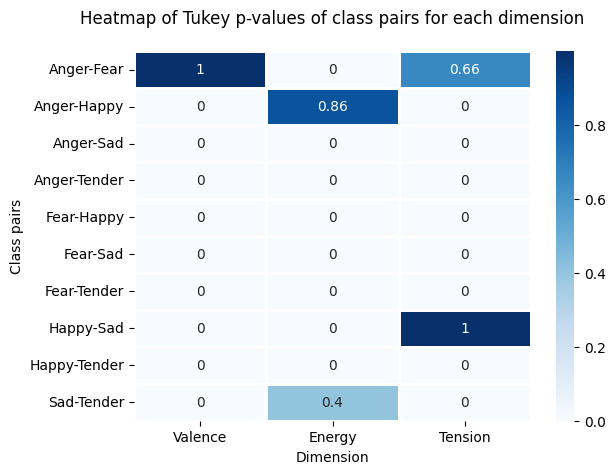

In [14]:
# TODO: HeatMap of Class pairwise Tukey differences

import seaborn as sns
import matplotlib.pyplot as plt

# Sample data
y_classes = ['Valence', 'Energy', 'Tension']
x_classes = ['Anger-Fear', 'Anger-Happy', 'Anger-Sad', 'Anger-Tender',
              'Fear-Happy', 'Fear-Sad', 'Fear-Tender', 'Happy-Sad', 'Happy-Tender', 'Sad-Tender']
heatmap_data = [[0.9987, 0, 0.6607],
                [0, 0.8627, 0],
                [0, 0, 0],
                [0, 0, 0],
                [0, 0, 0],
                [0, 0, 0],
                [0, 0, 0],
                [0, 0, 0.9995],
                [0, 0, 0],
                [0, 0.4044, 0]]

# Create a DataFrame from the data
df = pd.DataFrame(heatmap_data, index=x_classes, columns=y_classes)

# Plot the heatmap
sns.heatmap(df, annot=True, cmap='Blues', linecolor='white', linewidths=1) #cmap='Greens'

# Set labels and title
plt.xlabel('Dimension')
plt.ylabel('Class pairs')
plt.title('Heatmap of Tukey p-values of class pairs for each dimension', pad=20)

# Display the plot
plt.show()
